In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# verwendete Funktionen in Abhängigkeit der Zeit t

1. $C_j(t)$:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~C_j\left(t\right)=\frac{\left(1+\nu_jC_j^{\frac{1}{\eta}}\left(t+1\right)\right)\left(\prod\limits_{m=1\\m\neq j}^{n}\nu_mC_m^{\frac{1}{\eta}}\right)^{1-\eta}}{\left(\prod\limits_{i=1}^{n}\nu_iC_i^{\frac{1}{\eta}}\left(t+1\right)+\sum\limits_{k=1}^{n}\prod\limits_{l=1\\l\neq k}^{n}\nu_lC_l^{\frac{1}{\eta}}\left(t+1\right)\right)^{1-\eta}}$

2. Zustandsgleichung $x(t)$:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~x\left(t\right) = ax\left(t-1\right)\left(\frac{\prod\limits_{j=1}^{n}\nu_jC_j^{\frac{1}{\eta}}\left(t\right)}{\prod\limits_{j=1}^{n}\nu_jC_j^{\frac{1}{\eta}}\left(t\right)+\sum\limits_{k=1}^{n}\prod\limits_{l=1\\l\neq k}^{n}\nu_lC_l^{\frac{1}{\eta}}\left(t\right)}\right)$

3. Gleichgewichtsstrategien $\sigma_j$:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\sigma_j^{*}\left(t,x\right) = \frac{\left(\prod\limits_{i=1\\i\neq j}^{n}\nu_iC_i^{\frac{1}{\eta}}\left(t+1\right)\right)x\left(t\right)}{\prod\limits_{j=1}^{n}\nu_jC_j^{\frac{1}{\eta}}\left(t+1\right)+\sum\limits_{k=1}^{n}\prod\limits_{l=1\\l\neq k}^{n}\nu_lC_l^{\frac{1}{\eta}}\left(t+1\right)}$

4. Auszahlungsfunktion $J_j$:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~J_j = \sum\limits_{t=0}^{T-1}\beta_j^t\frac{u_j\left(t\right)^{1-\eta}}{1-\eta} + K_j\beta_j^T\frac{x\left(T\right)^{1-\eta}}{1-\eta}$


## Eingaben für das Modell

In [3]:
print("Anzahl der Spieler eingeben:")
n = int(input())

Anzahl der Spieler eingeben:
2


In [4]:
print("Anfangsbestand der Fische eingeben:")
x_0 = int(input())

Anfangsbestand der Fische eingeben:
1000


In [5]:
print("Zeithorizont eingeben:")
T = int(input())

Zeithorizont eingeben:
5


In [6]:
print("a eingeben:")
a = float(input())

a eingeben:
2


In [7]:
print("eta ungleich 1 eingeben:")
eta = float(input())

eta ungleich 1 eingeben:
0.5


In [8]:
beta = np.zeros(n)
print("Diskontfaktoren eingeben:")
for i in range (1,n+1):
    print("für Spieler ", i, ":")
    beta[i-1] = float(input())

Diskontfaktoren eingeben:
für Spieler  1 :
0.5
für Spieler  2 :
0.7


In [9]:
K = np.zeros(n)
print("Skalierungsfaktor für den Endbestand eingeben:")
for j in range (1,n+1):
    print("für Spieler ", j, ":")
    K[j-1] = float(input())

Skalierungsfaktor für den Endbestand eingeben:
für Spieler  1 :
1.2
für Spieler  2 :
0.9


## Funktionen für das endliche Modell

In [10]:
# Berechnung der C_j

def calcC(C, nu, T, n, eta):
    for t in range (T-1,0,-1):
        for j in range (0,n):
            prodDenominator = 1
            for i in range (0,n):
                prodDenominator = prodDenominator * nu[i]*(C[i][t]**(1/eta))
            
            sumDenominator = 0
            for k in range (0,n):
                prod2 = 1
                for l in range (0,n):
                    if l==k:
                        prod2 = prod2*1
                    else:
                        prod2 = prod2*(nu[l]*(C[l][t]**(1/eta)))
                sumDenominator = sumDenominator + prod2
            
            prodCounter = 1
            for m in range (0,n):
                if m == j:
                    prodCounter = prodCounter*1
                else:
                    prodCounter = prodCounter * nu[m]*(C[m][t]**(1/eta))
            
            C[j][t-1] = ((1+nu[j]*(C[j][t]**(1/eta)))*(prodCounter**(1-eta)))/((prodDenominator+sumDenominator)**(1-eta))
    
    return C

In [11]:
# Berechnung des Zustands zur Zeit t

def calcX(X, C, nu, T, n, eta, a):
    for t in range (1,T+1):
        
        prod = 1
        for i in range (0,n):
            prod = prod * nu[i]*(C[i][t-1]**(1/eta))
        
        sumDenominator = 0
        for k in range (0,n):
            prod2 = 1
            for l in range (0,n):
                if l==k:
                    prod2 = prod2*1
                else:
                    prod2 = prod2*(nu[l]*(C[l][t-1]**(1/eta)))
            sumDenominator = sumDenominator + prod2
        
        X[t] = a*X[t-1]*(prod/(prod+sumDenominator))
    
    return X

In [12]:
# Berechnung der Gleichgewichtsstrategien

def calcSigma(sigma, X, C, nu, T, n, eta):
    for j in range (0,n):
        for t in range (0,T):
            
            prodDenominator = 1
            for i in range (0,n):
                prodDenominator = prodDenominator * nu[i]*(C[i][t]**(1/eta))
            
            sumDenominator = 0
            for k in range (0,n):
                prod2 = 1
                for l in range (0,n):
                    if l==k:
                        prod2 = prod2*1
                    else:
                        prod2 = prod2*(nu[l]*(C[l][t]**(1/eta)))
                sumDenominator = sumDenominator + prod2
            
            prodCounter = 1
            for m in range (0,n):
                if m == j:
                    prodCounter = prodCounter*1
                else:
                    prodCounter = prodCounter * nu[m]*(C[m][t]**(1/eta))
                    
            
            sigma[j][t] = (prodCounter*X[t])/(prodDenominator + sumDenominator)
            
    return sigma

In [13]:
# Berechnung der Auszahlung

def calcJ(J, sigma, X, eta, T, K, beta, n):
    for j in range (0,n):
        J[j] = K[j]*(beta[j]**T)*((X[T]**(1-eta))/(1-eta))
        for t in range (0,T):
            J[j] = J[j] + (beta[j]**t)*(sigma[j][t]**(1-eta))/(1-eta)
    
    return J

## Berechnung des Modells unter Nutzung vorher definierter Funktionen

In [14]:
# Hauptteil

C = np.zeros([n,T])
X = np.zeros(T+1)
nu = np.zeros(n)
sigma = np.zeros([n,T])
J = np.zeros(n)


for j in range (0,n):
    nu[j] = (a**(1/eta-1))*(beta[j]**(1/eta))
    
print(nu)

[0.5  0.98]


In [15]:
# Hauptteil 
# C ausrechnen

for j in range (0,n):
    C[j][T-1] = K[j]

C = calcC(C, nu, T, n, eta)

print(C)

[[1.0871874  1.08509218 1.08373188 1.0611969  1.2       ]
 [1.05084396 1.04824788 1.04147053 1.05402824 0.9       ]]


In [16]:
# Haupteil 
# X ausrechnen

X[0] = x_0

X = calcX(X, C, nu, T, n, eta, a)

print(X)

[1000.          553.07664248  304.95570842  167.39017472   90.61687243
   49.67142446]


In [17]:
# Hauptteil 
# Gleichgewichtsstrategien ausrechnen

sigma = calcSigma(sigma, X, C, nu, T, n, eta)

print(sigma)

[[467.92527076 259.0022264  142.52342934  80.46687233  34.49404476]
 [255.53640799 141.59656187  78.73719173  41.61486617  31.28711543]]


In [18]:
# Hauptteil
# Auszahlung ausrechnen

J = calcJ(J, sigma, X, eta, T, K, beta, n)

print(J)

[68.83117905 66.56964416]


## Grafische Darstellung

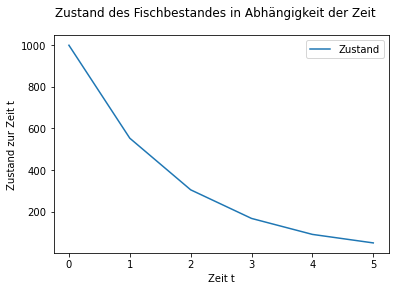

In [19]:
t = np.linspace(0,T,T+1, endpoint=True)
plt.plot(t,X, label='Zustand')
plt.xlabel('Zeit t')
plt.ylabel('Zustand zur Zeit t')
plt.suptitle('Zustand des Fischbestandes in Abhängigkeit der Zeit')
plt.legend()
plt.show()

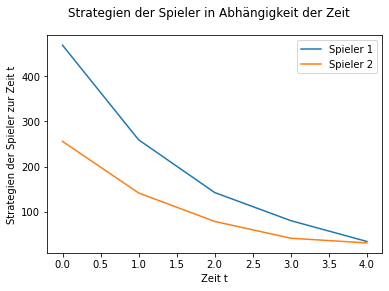

In [20]:
t = np.linspace(0,T-1,T, endpoint=True)
plt.plot(t,sigma[0], label='Spieler 1')
plt.plot(t,sigma[1], label='Spieler 2')
plt.xlabel('Zeit t')
plt.ylabel('Strategien der Spieler zur Zeit t')
plt.suptitle('Strategien der Spieler in Abhängigkeit der Zeit')
plt.legend()
plt.show()




# Einfluss der Parameter

Dazu werde der nicht-identische Zwei-Spieler-Fall mit Nutzenfunktion $U\left(x\right) = 2\sqrt{x}$ betrachtet

## Definition der Variablen

In [21]:
# im Folgenden soll gelten:

n2, n3 = 3, 4
x2_0, x3_0 = 500, 1500
T2, T3, T4 = 2, 15, 25
a2, a3, a4 = 1, 2.5, 2.9
eta2, eta3 = 0.25, 0.75
beta2, beta3, beta4 = np.array([0.7, 0.7]), np.array([0.2, 0.7]), np.array([0.8, 0.7])
beta5, beta6 = np.array([0.7, 0.7, 0.7]), np.array([0.7, 0.7, 0.7, 0.7])
beta7, beta8 = np.array([0.4, 0.4]), np.array([0.9, 0.9])
K2, K3 = np.array([1.2, 0.9, 1.2]), np.array([1.2, 0.9, 1.2, 0.9])

## Berechnung und grafische Darstellung

In [22]:
# a soll angepasst werden

C2, C3, C4 = np.zeros([n,T]), np.zeros([n,T]), np.zeros([n,T])
X2, X3, X4 = np.zeros(T+1), np.zeros(T+1), np.zeros(T+1)
nu2, nu3, nu4 = np.zeros(n), np.zeros(n), np.zeros(n)
sigma2, sigma3, sigma4 = np.zeros([n,T]), np.zeros([n,T]), np.zeros([n,T])
J2, J3, J4 = np.zeros(n), np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu2[o] = (a2**(1/eta-1))*(beta[o]**(1/eta))
    nu3[o] = (a3**(1/eta-1))*(beta[o]**(1/eta))
    nu4[o] = (a4**(1/eta-1))*(beta[o]**(1/eta))

for p in range (0,n):
    C2[p][T-1] = K[p]
    C3[p][T-1] = K[p]
    C4[p][T-1] = K[p]

C2 = calcC(C2, nu2, T, n, eta)
C3 = calcC(C3, nu3, T, n, eta)
C4 = calcC(C4, nu4, T, n, eta)

X2[0] = x_0
X3[0] = x_0
X4[0] = x_0

X2 = calcX(X2, C2, nu2, T, n, eta, a2)
X3 = calcX(X3, C3, nu3, T, n, eta, a3)
X4 = calcX(X4, C4, nu4, T, n, eta, a4)

sigma2 = calcSigma(sigma2, X2, C2, nu2, T, n, eta)
sigma3 = calcSigma(sigma3, X3, C3, nu3, T, n, eta)
sigma4 = calcSigma(sigma4, X4, C4, nu4, T, n, eta)

J2 = calcJ(J2, sigma2, X2, eta, T, K, beta, n)
J3 = calcJ(J3, sigma3, X3, eta, T, K, beta, n)
J4 = calcJ(J4, sigma4, X4, eta, T, K, beta, n)

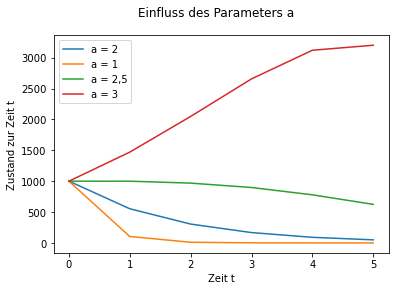

In [23]:
t = np.linspace(0,T,T+1, endpoint=True)
plt.plot(t,X, label='a = 2')
plt.plot(t,X2, label='a = 1')
plt.plot(t,X3, label='a = 2,5')
plt.plot(t,X4, label='a = 3')
plt.xlabel('Zeit t')
plt.ylabel('Zustand zur Zeit t')
plt.suptitle('Einfluss des Parameters a')
plt.legend()
plt.show()

In [24]:
# beta_1 wird angepasst

C5, C6 = np.zeros([n,T]), np.zeros([n,T])
X5, X6 = np.zeros(T+1), np.zeros(T+1)
nu5, nu6 = np.zeros(n), np.zeros(n)
sigma5, sigma6 = np.zeros([n,T]), np.zeros([n,T])
J5, J6 = np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu5[o] = (a**(1/eta-1))*(beta3[o]**(1/eta))
    nu6[o] = (a**(1/eta-1))*(beta4[o]**(1/eta))

for p in range (0,n):
    C5[p][T-1] = K[p]
    C6[p][T-1] = K[p]

C5 = calcC(C5, nu5, T, n, eta)
C6 = calcC(C6, nu6, T, n, eta)

X5[0] = x_0
X6[0] = x_0

X5 = calcX(X5, C5, nu5, T, n, eta, a)
X6 = calcX(X6, C6, nu6, T, n, eta, a)

sigma5 = calcSigma(sigma5, X5, C5, nu5, T, n, eta)
sigma6 = calcSigma(sigma6, X6, C6, nu6, T, n, eta)

J5 = calcJ(J5, sigma5, X5, eta, T, K, beta3, n)
J6 = calcJ(J6, sigma6, X6, eta, T, K, beta4, n)

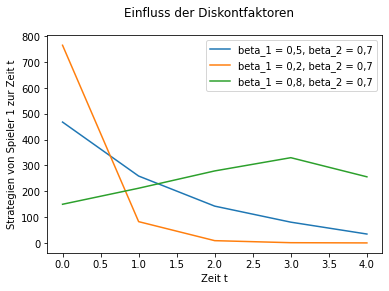

In [25]:
t = np.linspace(0,T-1,T, endpoint=True)
plt.plot(t,sigma[0], label='beta_1 = 0,5, beta_2 = 0,7')
plt.plot(t,sigma5[0], label='beta_1 = 0,2, beta_2 = 0,7')
plt.plot(t,sigma6[0], label='beta_1 = 0,8, beta_2 = 0,7')
plt.xlabel('Zeit t')
plt.ylabel('Strategien von Spieler 1 zur Zeit t')
plt.suptitle('Einfluss der Diskontfaktoren')
plt.legend()
plt.show()

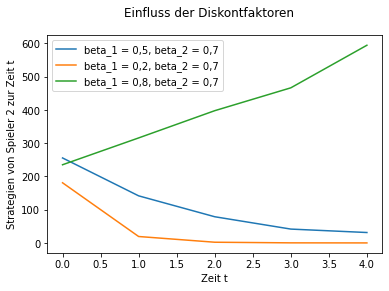

In [26]:
t = np.linspace(0,T-1,T, endpoint=True)
plt.plot(t,sigma[1], label='beta_1 = 0,5, beta_2 = 0,7')
plt.plot(t,sigma5[1], label='beta_1 = 0,2, beta_2 = 0,7')
plt.plot(t,sigma6[1], label='beta_1 = 0,8, beta_2 = 0,7')
plt.xlabel('Zeit t')
plt.ylabel('Strategien von Spieler 2 zur Zeit t')
plt.suptitle('Einfluss der Diskontfaktoren')
plt.legend()
plt.show()

In [27]:
# T wird angepasst

C7, C8, C9 = np.zeros([n,T2]), np.zeros([n,T3]), np.zeros([n,T4])
X7, X8, X9 = np.zeros(T2+1), np.zeros(T3+1), np.zeros(T4+1)
nu7, nu8, nu9 = np.zeros(n), np.zeros(n), np.zeros(n)
sigma7, sigma8, sigma9 = np.zeros([n,T2]), np.zeros([n,T3]), np.zeros([n,T4])
J7, J8, J9 = np.zeros(n), np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu7[o] = (a**(1/eta-1))*(beta[o]**(1/eta))
    nu8[o] = (a**(1/eta-1))*(beta[o]**(1/eta))
    nu9[o] = (a**(1/eta-1))*(beta[o]**(1/eta))

for p in range (0,n):
    C7[p][T2-1] = K[p]
    C8[p][T3-1] = K[p]
    C9[p][T4-1] = K[p]

C7 = calcC(C7, nu7, T2, n, eta)
C8 = calcC(C8, nu8, T3, n, eta)
C9 = calcC(C9, nu9, T4, n, eta)

X7[0] = x_0
X8[0] = x_0
X9[0] = x_0

X7 = calcX(X7, C7, nu7, T2, n, eta, a)
X8 = calcX(X8, C8, nu8, T3, n, eta, a)
X9 = calcX(X9, C9, nu9, T4, n, eta, a)

sigma7 = calcSigma(sigma7, X7, C7, nu7, T2, n, eta)
sigma8 = calcSigma(sigma8, X8, C8, nu8, T3, n, eta)
sigma = calcSigma(sigma9, X9, C9, nu9, T4, n, eta)

J7 = calcJ(J7, sigma7, X7, eta, T2, K, beta, n)
J8 = calcJ(J8, sigma8, X8, eta, T3, K, beta, n)
J9 = calcJ(J9, sigma9, X9, eta, T4, K, beta, n)

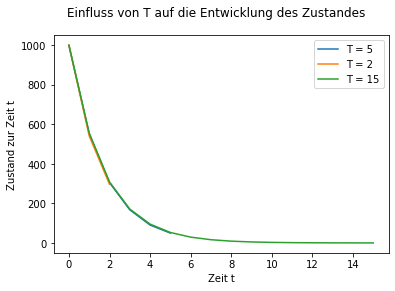

In [28]:
t = np.linspace(0,T,T+1, endpoint=True)
t2 = np.linspace(0,T2,T2+1, endpoint=True)
t3 = np.linspace(0,T3,T3+1, endpoint=True)
t4 = np.linspace(0,T4,T4+1, endpoint=True)
plt.plot(t,X, label='T = 5')
plt.plot(t2,X7, label='T = 2')
plt.plot(t3,X8, label='T = 15')
plt.xlabel('Zeit t')
plt.ylabel('Zustand zur Zeit t')
plt.suptitle('Einfluss von T auf die Entwicklung des Zustandes')
plt.legend()
plt.show()

In [29]:
print(X)
print(X7)
print(X8)
print(X9)

[1000.          553.07664248  304.95570842  167.39017472   90.61687243
   49.67142446]
[1000.          541.35120285  296.74038243]
[1.00000000e+03 5.55577453e+02 3.08660451e+02 1.71476140e+02
 9.52585059e+01 5.29134747e+01 2.93877632e+01 1.63178717e+01
 9.05710024e+00 5.02377863e+00 2.78355124e+00 1.53951718e+00
 8.48859842e-01 4.65939129e-01 2.52236708e-01 1.38262955e-01]
[1.00000000e+03 5.55593375e+02 3.08683961e+02 1.71502709e+02
 9.52857066e+01 5.29400435e+01 2.94130751e+01 1.63416503e+01
 9.07925684e+00 5.04432295e+00 2.80254417e+00 1.55703035e+00
 8.65034547e-01 4.80569457e-01 2.66966170e-01 1.48292350e-01
 8.23605045e-02 4.57315562e-02 2.53829235e-02 1.40793615e-02
 7.80102531e-03 4.31456489e-03 2.37896720e-03 1.30581499e-03
 7.06904515e-04 3.87488039e-04]


In [30]:
# x_0 wird angepasst

C10, C11 = np.zeros([n,T]), np.zeros([n,T])
X10, X11 = np.zeros(T+1), np.zeros(T+1)
nu10, nu11 = np.zeros(n), np.zeros(n)
sigma10, sigma11 = np.zeros([n,T]), np.zeros([n,T])
J10, J11 = np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu10[o] = (a**(1/eta-1))*(beta[o]**(1/eta))
    nu11[o] = (a**(1/eta-1))*(beta[o]**(1/eta))

for p in range (0,n):
    C10[p][T-1] = K[p]
    C11[p][T-1] = K[p]

C10 = calcC(C10, nu10, T, n, eta)
C11 = calcC(C11, nu11, T, n, eta)

X10[0] = x2_0
X11[0] = x3_0

X10 = calcX(X10, C10, nu10, T, n, eta, a)
X11 = calcX(X11, C11, nu11, T, n, eta, a)

sigma10 = calcSigma(sigma10, X10, C10, nu10, T, n, eta)
sigma11 = calcSigma(sigma11, X11, C11, nu11, T, n, eta)

J10 = calcJ(J10, sigma10, X10, eta, T, K, beta, n)
J11 = calcJ(J11, sigma11, X11, eta, T, K, beta, n)

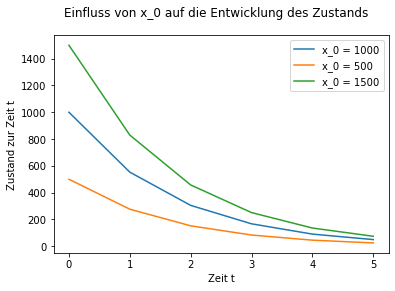

In [31]:
t = np.linspace(0,T,T+1, endpoint=True)
plt.plot(t,X, label='x_0 = 1000')
plt.plot(t,X10, label='x_0 = 500')
plt.plot(t,X11, label='x_0 = 1500')
plt.xlabel('Zeit t')
plt.ylabel('Zustand zur Zeit t')
plt.suptitle('Einfluss von x_0 auf die Entwicklung des Zustands')
plt.legend()
plt.show()

In [32]:
# n wird angepasst

C12, C13, C16 = np.zeros([n2,T]), np.zeros([n3,T]), np.zeros([n,T])
X12, X13, X16 = np.zeros(T+1), np.zeros(T+1), np.zeros(T+1)
nu12, nu13, nu16 = np.zeros(n2), np.zeros(n3), np.zeros(n)
sigma12, sigma13, sigma16 = np.zeros([n2,T]), np.zeros([n3,T]), np.zeros([n,T])
J12, J13, J16 = np.zeros(n2), np.zeros(n3), np.zeros(n)

for o in range (0,n2):
    nu12[o] = (a**(1/eta-1))*(beta5[o]**(1/eta))
for o2 in range (0,n3):
    nu13[o2] = (a**(1/eta-1))*(beta6[o2]**(1/eta))
for o3 in range (0,n):
    nu16[o3] = (a**(1/eta-1))*(beta2[o3]**(1/eta))

for p in range (0,n2):
    C12[p][T-1] = K2[p]
for p2 in range (0,n3):
    C13[p2][T-1] = K3[p2]
for p3 in range (0,n):
    C16[p3][T-1] = K[p3]

C12 = calcC(C12, nu12, T, n2, eta)
C13 = calcC(C13, nu13, T, n3, eta)
C16 = calcC(C16, nu16, T, n, eta)

X12[0] = x_0
X13[0] = x_0
X16[0] = x_0

X12 = calcX(X12, C12, nu12, T, n2, eta, a)
X13 = calcX(X13, C13, nu13, T, n3, eta, a)
X16 = calcX(X16, C16, nu16, T, n, eta, a)

sigma12 = calcSigma(sigma12, X12, C12, nu12, T, n2, eta)
sigma13 = calcSigma(sigma13, X13, C13, nu13, T, n3, eta)
sigma16 = calcSigma(sigma16, X16, C16, nu16, T, n, eta)

J12 = calcJ(J12, sigma12, X12, eta, T, K2, beta5, n2)
J13 = calcJ(J13, sigma13, X13, eta, T, K3, beta6, n3)
J16 = calcJ(J16, sigma16, X16, eta, T, K, beta2, n)

In [33]:
sumSigmaPlayer = np.zeros(T)
sumSigmaPlayer2 = np.zeros(T)
sumSigmaPlayer3 = np.zeros(T)
for t in range (0,T):
    for j in range (0,n):
        sumSigmaPlayer[t] = sumSigmaPlayer[t] + sigma[j][t]
    for j2 in range (0,n2):
        sumSigmaPlayer2[t] = sumSigmaPlayer2[t] + sigma12[j2][t]
    for j3 in range (0,n3):
        sumSigmaPlayer3[t] = sumSigmaPlayer3[t] + sigma13[j3][t]
        
print(sumSigmaPlayer)

[722.20331228 401.2513947  222.932607   123.85985562  68.81568484]


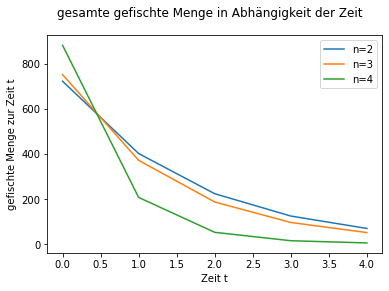

In [34]:
t = np.linspace(0,T-1,T, endpoint=True)
plt.plot(t,sumSigmaPlayer, label='n=2')
plt.plot(t,sumSigmaPlayer2, label='n=3')
plt.plot(t,sumSigmaPlayer3, label='n=4')
plt.xlabel('Zeit t')
plt.ylabel('gefischte Menge zur Zeit t')
plt.suptitle('gesamte gefischte Menge in Abhängigkeit der Zeit')
plt.legend()
plt.show()

In [35]:
# eta ändert sich

C14, C15 = np.zeros([n,T]), np.zeros([n,T])
X14, X15 = np.zeros(T+1), np.zeros(T+1)
nu14, nu15 = np.zeros(n), np.zeros(n)
sigma14, sigma15 = np.zeros([n,T]), np.zeros([n,T])
J14, J15 = np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu14[o] = (a**(1/eta2-1))*(beta[o]**(1/eta2))
    nu15[o] = (a**(1/eta3-1))*(beta[o]**(1/eta3))

for p in range (0,n):
    C14[p][T-1] = K[p]
    C15[p][T-1] = K[p]

C14 = calcC(C14, nu14, T, n, eta2)
C15 = calcC(C15, nu15, T, n, eta3)

X14[0] = x_0
X15[0] = x_0

X14 = calcX(X14, C14, nu14, T, n, eta2, a)
X15 = calcX(X15, C15, nu15, T, n, eta3, a)

sigma14 = calcSigma(sigma14, X14, C14, nu14, T, n, eta2)
sigma13 = calcSigma(sigma13, X13, C13, nu13, T, n, eta3)

J14 = calcJ(J14, sigma14, X14, eta2, T, K, beta, n)
J15 = calcJ(J15, sigma15, X15, eta3, T, K, beta, n)

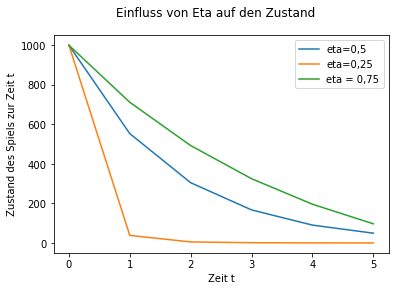

In [36]:
t = np.linspace(0,T,T+1, endpoint=True)
plt.plot(t,X, label='eta=0,5')
plt.plot(t,X14, label='eta=0,25')
plt.plot(t,X15, label='eta = 0,75')
plt.xlabel('Zeit t')
plt.ylabel('Zustand des Spiels zur Zeit t')
plt.suptitle('Einfluss von Eta auf den Zustand')
plt.legend()
plt.show()

In [37]:
# was passiert, wenn a steigt und beta sinkt

C17, C18, C19 = np.zeros([n,T]), np.zeros([n,T]), np.zeros([n,T])
X17, X18, X19 = np.zeros(T+1), np.zeros(T+1), np.zeros(T+1)
nu17, nu18, nu19 = np.zeros(n), np.zeros(n), np.zeros(n)
sigma17, sigma18, sigma19 = np.zeros([n,T]), np.zeros([n,T]), np.zeros([n,T])
J17, J18, J19 = np.zeros(n), np.zeros(n), np.zeros(n)

for o in range (0,n):
    nu17[o] = (a**(1/eta-1))*(beta2[o]**(1/eta))
    nu18[o] = (a2**(1/eta-1))*(beta8[o]**(1/eta))
    nu19[o] = (a3**(1/eta-1))*(beta7[o]**(1/eta))

for p in range (0,n):
    C17[p][T-1] = K[p]
    C18[p][T-1] = K[p]
    C19[p][T-1] = K[p]

C17 = calcC(C17, nu17, T, n, eta)
C18 = calcC(C18, nu18, T, n, eta)
C19 = calcC(C19, nu19, T, n, eta)

X17[0] = x_0
X18[0] = x_0
X19[0] = x_0

X17 = calcX(X17, C17, nu17, T, n, eta, a)
X18 = calcX(X18, C18, nu18, T, n, eta, a2)
X19 = calcX(X19, C19, nu19, T, n, eta, a3)

sigma17 = calcSigma(sigma17, X17, C17, nu17, T, n, eta)
sigma18 = calcSigma(sigma18, X18, C18, nu18, T, n, eta)
sigma19 = calcSigma(sigma19, X19, C19, nu19, T, n, eta)

J17 = calcJ(J17, sigma17, X17, eta, T, K, beta2, n)
J18 = calcJ(J18, sigma18, X18, eta, T, K, beta8, n)
J19 = calcJ(J19, sigma19, X19, eta, T, K, beta7, n)


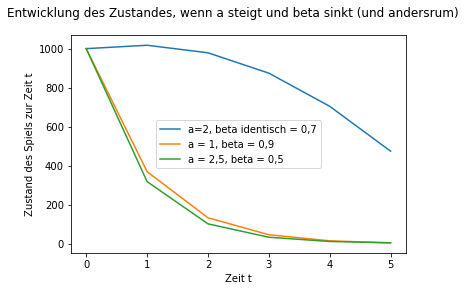

In [38]:
t = np.linspace(0,T,T+1, endpoint=True)
plt.plot(t,X17, label='a=2, beta identisch = 0,7')
plt.plot(t,X18, label='a = 1, beta = 0,9')
plt.plot(t,X19, label='a = 2,5, beta = 0,5')
plt.xlabel('Zeit t')
plt.ylabel('Zustand des Spiels zur Zeit t')
plt.suptitle('Entwicklung des Zustandes, wenn a steigt und beta sinkt (und andersrum)')
plt.legend()
plt.show()